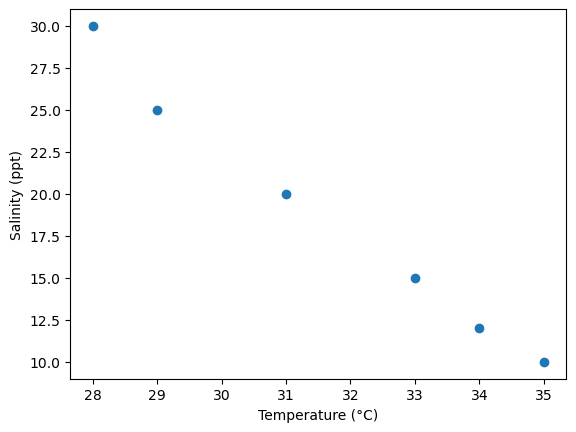

In [2]:
import matplotlib.pyplot as plt

# Create some sample data
temperature = [10, 12, 15, 20, 25, 30]
salinity = [35, 34, 33, 31, 29, 28]

# Create the T-S plot
plt.scatter(salinity,temperature)
plt.xlabel('Temperature (°C)')
plt.ylabel('Salinity (ppt)')
plt.show()


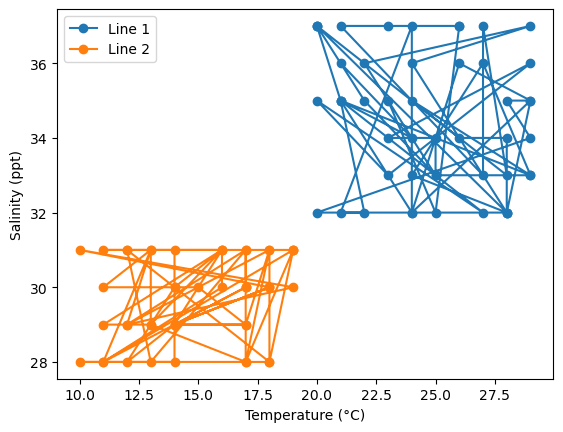

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for the first line
temperature1 = np.random.randint(20, 30, size=50)
salinity1 = np.random.randint(32, 38, size=50)

# Generate random data for the second line
temperature2 = np.random.randint(10, 20, size=50)
salinity2 = np.random.randint(28, 32, size=50)

# Create the T-S plot
plt.plot(temperature1, salinity1, '-o', label='Line 1')
plt.plot(temperature2, salinity2, '-o', label='Line 2')
plt.xlabel('Temperature (°C)')
plt.ylabel('Salinity (ppt)')
plt.legend()
plt.show()


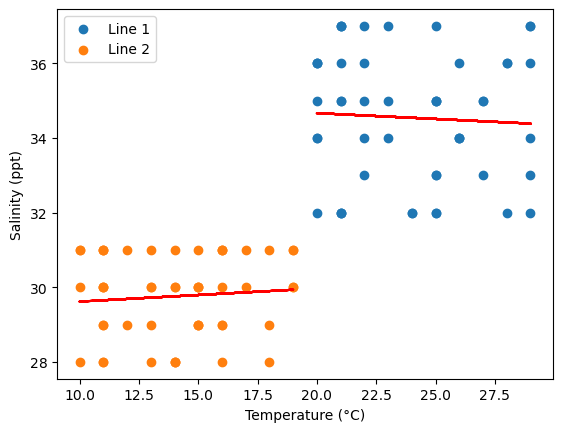

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for the first line
temperature1 = np.random.randint(20, 30, size=50)
salinity1 = np.random.randint(32, 38, size=50)
# Fit a linear equation to the data points
coef1 = np.polyfit(temperature1, salinity1, 1)

# Generate random data for the second line
temperature2 = np.random.randint(10, 20, size=50)
salinity2 = np.random.randint(28, 32, size=50)
# Fit a linear equation to the data points
coef2 = np.polyfit(temperature2, salinity2, 1)

# Create the T-S plot
plt.scatter(temperature1, salinity1, label='Line 1')
plt.scatter(temperature2, salinity2, label='Line 2')
plt.plot(temperature1, coef1[0] * temperature1 + coef1[1], '-', color='r')
plt.plot(temperature2, coef2[0] * temperature2 + coef2[1], '-', color='r')
plt.xlabel('Temperature (°C)')
plt.ylabel('Salinity (ppt)')
plt.legend()
plt.show()

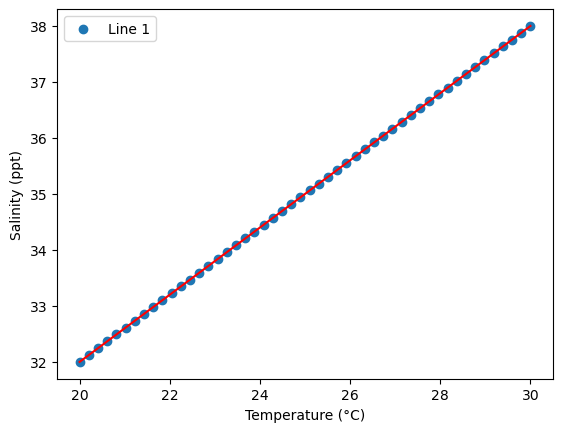

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate ordered data for the first line
temperature1 = np.linspace(20,30,50)
salinity1 = np.linspace(32,38,50)

# Fit a linear equation to the data points
coef1 = np.polyfit(temperature1, salinity1, 1)

# Generate ordered data for the second line
temperature2 = np.linspace(10,20,50)
salinity2 = np.linspace(28,32,50)

# Fit a linear equation to the data points
coef2 = np.polyfit(temperature2, salinity2, 1)

# Create the T-S plot
plt.scatter(temperature1, salinity1, label='Line 1')
plt.plot(temperature1, coef1[0] * temperature1 + coef1[1], '-', color='r')
plt.xlabel('Temperature (°C)')
plt.ylabel('Salinity (ppt)')
plt.legend()
plt.show()

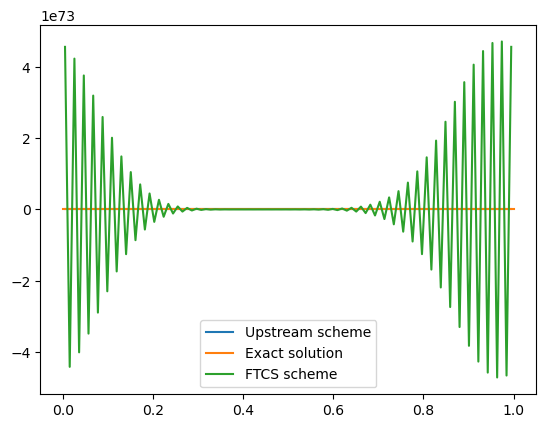

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# define the advection velocity, grid spacing and time step
c = 0.1
dx = 0.01
dt = 0.001

# define the grid
Lx = 1.0
Nx = 96
x = np.linspace(0, Lx, Nx+1)
x = x[:-1] + dx/2

# define the initial condition
a = 0.1
f = np.exp(-(x - Lx/2)**2 / a**2)

# create the time-stepping loop
nsteps = int(Lx / c / dt)

# upstream scheme
u_up = f.copy()
for n in range(nsteps):
    u_up[1:] = u_up[1:] - c * dt / dx * (u_up[1:] - u_up[:-1])
    u_up[0] = u_up[-1]

# forward in time, centered in space scheme
u_cen = f.copy()
for n in range(nsteps):
    u_cen[:-1] = u_cen[:-1] - c * dt / dx * (u_cen[1:] - u_cen[:-1])
    u_cen[-1] = u_cen[0]

# exact solution
x_exact = np.linspace(0, Lx, Nx+1)
t = nsteps * dt
f_exact = np.exp(-(x_exact - c*t - Lx/2)**2 / a**2)

#plot the results

plt.plot(x, u_up, label='Upstream scheme')
plt.plot(x_exact, f_exact, label='Exact solution')
plt.plot(x, u_cen, label='FTCS scheme')
plt.legend()
plt.show()

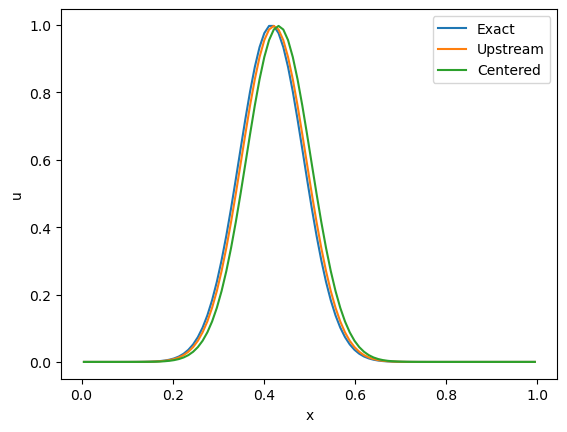

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# define the advection velocity and grid spacing
c = 0.1
dx = 0.01
dt = 0.5 * dx / c

# define the grid
Lx = 1
nx = 96
x = np.linspace(0.5*dx, Lx-0.5*dx, nx)

# define the initial condition
a = 0.1
u_exact = np.exp(-(x - Lx/2)**2 / (a**2))

# create arrays to store the numerical solutions
u_upstream = u_exact.copy()
u_centered = u_exact.copy()

# create the time-stepping loop
nsteps = int(Lx / (c * dt))
for n in range(nsteps):
    # apply the upstream scheme
    u_upstream[:-1] = u_exact[:-1] - c * dt / dx * (u_exact[:-1] - u_exact[1:])
    # apply the centered scheme
    u_centered[1:] = u_exact[1:] - c * dt / dx * (u_exact[1:] - u_exact[:-1])
    # update the exact solution for the next time step
    u_exact = np.roll(u_exact, -1)

# plot the solutions
plt.plot(x, u_exact,label='Exact')
plt.plot(x, u_upstream, label='Upstream')
plt.plot(x, u_centered, label='Centered')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.show()

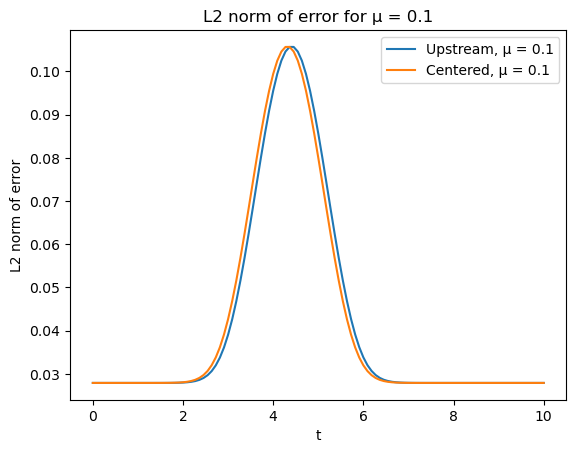

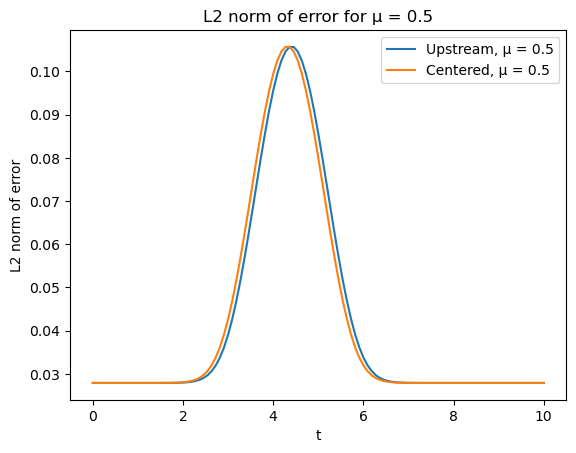

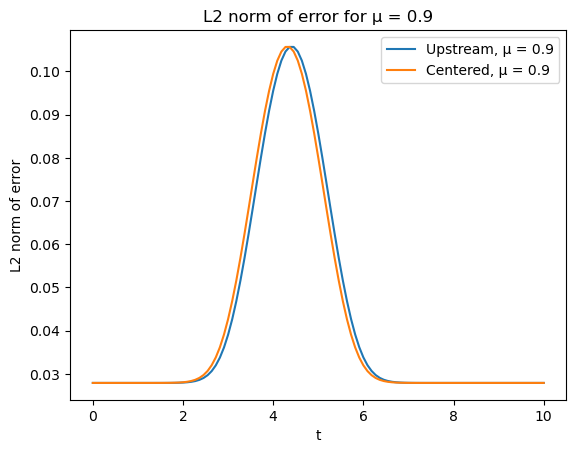

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# define the advection velocity and grid spacing
c = 0.1
dx = 0.01

# define the grid
Lx = 1
nx = 96
x = np.linspace(0.5*dx, Lx-0.5*dx, nx)

# define the initial condition
a = 0.1
u_exact = np.exp(-(x - Lx/2)**2 / (a**2))

# create arrays to store the numerical solutions and errors
u_upstream = u_exact.copy()
u_centered = u_exact.copy()

# create arrays to store the l2 norms of the errors
l2_up = []
l2_cen = []

# create the time-stepping loop for different values of µ
for m in [0.1, 0.5, 0.9]:
    dt = m * dx / c
    nsteps = int(Lx / (c * dt))
    u_exact = np.exp(-(x - Lx/2)**2 / (2*a**2))
    u_upstream = u_exact.copy()
    u_centered = u_exact.copy()
    
l2_up_temp = []
l2_cen_temp = []
for n in range(nsteps):
    
# apply the upstream scheme
    u_upstream[:-1] = u_exact[:-1] - c * dt / dx * (u_exact[:-1] - u_exact[1:])
# apply the centered scheme
    u_centered[1:] = u_exact[1:] - c * dt / dx * (u_exact[1:] - u_exact[:-1])
# calculate the l2 norm of the errors
    l2_up_temp.append(np.sqrt(np.sum((u_exact - u_upstream)**2) / nx))
    l2_cen_temp.append(np.sqrt(np.sum((u_exact - u_centered)**2) / nx))
# update the exact solution for the next time step
    u_exact = np.roll(u_exact, -1)
    l2_up.append(l2_up_temp)
    l2_cen.append(l2_cen_temp)
    
#plot the time series of the l2 norm of the error
t = np.linspace(0, Lx/c, nsteps)
for i, m in enumerate([0.1, 0.5, 0.9]):
    
    plt.figure()
    plt.plot(t, l2_up[i], label='Upstream, µ = {}'.format(m))
    plt.plot(t, l2_cen[i], label='Centered, µ = {}'.format(m))
    plt.xlabel('t')
    plt.ylabel('L2 norm of error')
    plt.legend()
    plt.title('L2 norm of error for µ = {}'.format(m))
    plt.show()



ValueError: x and y must have same first dimension, but have shapes (111,) and (1000,)

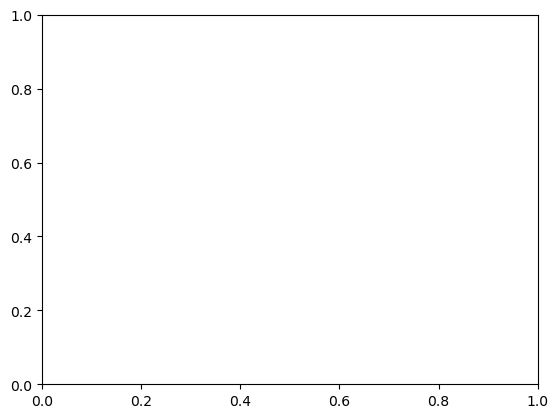

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# define the advection velocity and grid spacing
c = 0.1
dx = 0.01

# define the grid
Lx = 1
nx = 96
x = np.linspace(0.5*dx, Lx-0.5*dx, nx)

# define the initial condition
a = 0.01
u_exact = np.exp(-(x - Lx/2)**2 / (2*a**2))

# create arrays to store the numerical solutions and errors
u_upstream = u_exact.copy()
u_centered = u_exact.copy()

# create arrays to store the l2 norms of the errors
l2_up = []
l2_cen = []

# create the time-stepping loop for different values of µ
for m in [0.1, 0.5, 0.9]:
    dt = m * dx / c
    nsteps = int(Lx / (c * dt))
    u_exact = np.exp(-(x - Lx/2)**2 / (2*a**2))
    u_upstream = u_exact.copy()
    u_centered = u_exact.copy()
    l2_up_temp = []
    l2_cen_temp = []
    for n in range(nsteps):
        # apply the upstream scheme
        u_upstream[:-1] = u_exact[:-1] - c * dt / dx * (u_exact[:-1] - u_exact[1:])
        # apply the centered scheme
        u_centered[1:] = u_exact[1:] - c * dt / dx * (u_exact[1:] - u_exact[:-1])
        
        # calculate the l2 norm of the errors using the fft function
        l2_up_temp.append(np.sqrt(np.sum(np.abs(fft(u_exact - u_upstream))**2) / nx))
        l2_cen_temp.append(np.sqrt(np.sum(np.abs(fft(u_exact - u_centered))**2) / nx))
        # update the exact solution for the next time step
        u_exact = np.roll(u_exact, -1)
    l2_up.append(l2_up_temp)
    l2_cen.append(l2_cen_temp)

#plot the time series of the l2 norm of the error
t = np.linspace(0, Lx/c, nsteps)
for i, m in enumerate([0.1, 0.5, 0.9]):
    
    plt.figure()
    plt.plot(t, l2_up[i], label='Upstream, µ = {}'.format(m))
    plt.plot(t, l2_cen[i], label='Centered, µ = {}'.format(m))
    plt.xlabel('t')
    plt.ylabel('L2 norm of error')
    plt.legend()
    plt.title('L2')




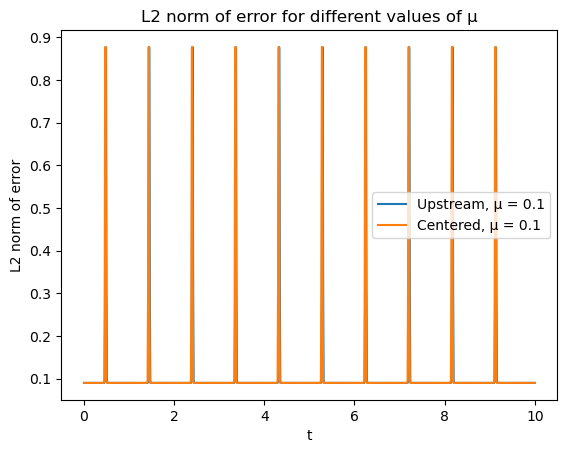

ValueError: x and y must have same first dimension, but have shapes (200,) and (1000,)

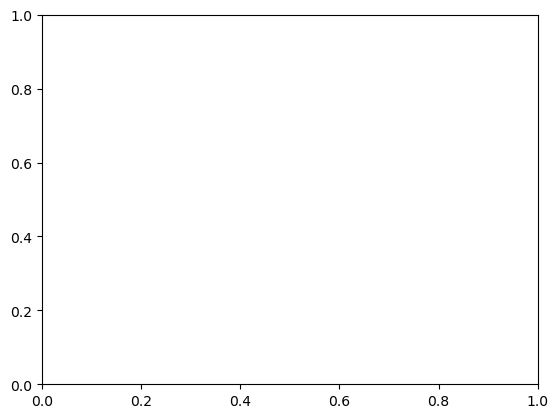

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# define the advection velocity and grid spacing
c = 0.1
dx = 0.01

# define the grid
Lx = 1
nx = 96
x = np.linspace(0.5*dx, Lx-0.5*dx, nx)

# define the initial condition
a = 0.01
u_exact = np.exp(-(x - Lx/2)**2 / (2*a**2))

# create arrays to store the numerical solutions and errors
u_upstream = u_exact.copy()
u_centered = u_exact.copy()

# create arrays to store the l2 norms of the errors
l2_up = []
l2_cen = []

# create the time-stepping loop for different values of µ
for m in [0.1, 0.5, 0.9]:
    dt = m * dx / c
    nsteps = int(Lx / (c * dt))
    u_exact = np.exp(-(x - Lx/2)**2 / (2*a**2))
    u_upstream = u_exact.copy()
    u_centered = u_exact.copy()
    l2_up_temp = []
    l2_cen_temp = []
    for n in range(nsteps):
        # apply the upstream scheme
        u_upstream[:-1] = u_exact[:-1] - c * dt / dx * (u_exact[:-1] - u_exact[1:])
        # apply the centered scheme
        u_centered[1:] = u_exact[1:] - c * dt / dx * (u_exact[1:] - u_exact[:-1])
        # calculate the l2 norm of the errors using the fft function
        l2_up_temp.append(np.sqrt(np.sum(np.abs(fft(u_exact - u_upstream))**2) / nx))
        l2_cen_temp.append(np.sqrt(np.sum(np.abs(fft(u_exact - u_centered))**2) / nx))
        # update the exact solution for the next time step
        u_exact = np.roll(u_exact, -1)
    l2_up.append(l2_up_temp)
    l2_cen.append(l2_cen_temp)
   # plot the time series of the l2 norm of the error
    t = np.linspace(0, Lx/c, nsteps)
    plt.figure()
    plt.plot(t, l2_up[i], label='Upstream, µ = {}'.format(m))
    plt.plot(t, l2_cen[i], label='Centered, µ = {}'.format(m))
    plt.xlabel('t')
    plt.ylabel('L2 norm of error')
    plt.legend()
    plt.title('L2 norm of error for different values of µ')
    plt.show()



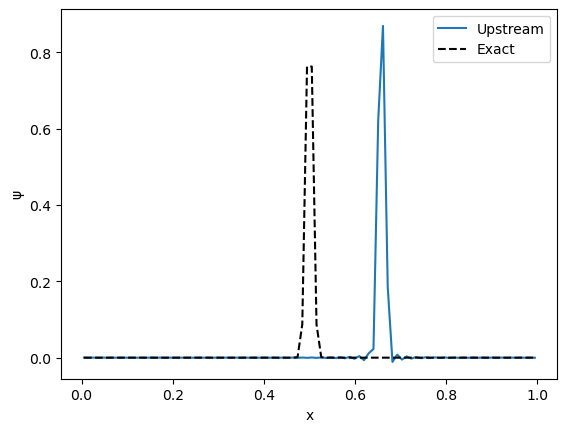

In [2]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt

# set parameters
c = 0.1 # m/s
Lx = 1 # m
Nx = 96
dx = Lx/Nx
a = 0.01

# define initial condition
x = np.linspace(0.5*dx, Lx-0.5*dx, Nx)
f = np.exp(-(x-Lx/2)**2/a**2)

# set time step and number of steps
dt = 0.5*dx/c
nsteps = int(Lx/c/dt)

# set up empty arrays to store solutions
phi_up = np.zeros((nsteps, Nx))
phi_cen = np.zeros((nsteps, Nx))

# set initial conditions
phi_up[0,:] = f
phi_cen[0,:] = f

# use FFT to compute the spatial derivative
k = np.fft.fftfreq(Nx, dx)
ik = 1j*k

# time loop
for n in range(1, nsteps):
    phi_up[n,:] = ifft(np.exp(-c*ik*dt)*fft(phi_up[n-1,:])).real
    phi_cen[n,:] = ifft(np.exp(-c*ik*dt)*fft(phi_cen[n-1,:])).real

# plot the solutions
plt.figure()
plt.plot(x, phi_up[-1,:], label='Upstream')
#plt.plot(x, phi_cen[-1,:], label='Centered')
plt.plot(x, f, 'k--', label='Exact')
plt.xlabel('x')
plt.ylabel('ψ')
plt.legend()
plt.show()


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# set parameters
c = 0.1 # m/s
Lx = 1 # m
Nx = 96
dx = Lx/Nx
a = 0.01

# define initial condition
x = np.linspace(0, Lx, Nx+1)
f = np.exp(-(x-Lx/2)**2/a**2)

# set time step and number of steps
dt = 0.5*dx/c
nsteps = int(Lx/c/dt)

# set up empty arrays to store solutions
phi_up = np.zeros((nsteps, Nx+1))
phi_cen = np.zeros((nsteps, Nx+1))

# set initial conditions
phi_up[0,:] = f
phi_cen[0,:] = f

# time loop
for n in range(1, nsteps):
    for i in range(1, Nx):
        phi_up[n,i] = phi_up[n-1,i] - c*dt/dx*(phi_up[n-1,i]-phi_up[n-1,i-1])
        phi_cen[n,i] = phi_cen[n-1,i] - c*dt/dx*(phi_cen[n-1,i+1]-phi_cen[n-1,i])
    phi_up[n,0] = phi_up[n-1,0] - c*dt/dx*(phi_up[n-1,0]-phi_up
    # periodic boundary conditions
    phi_up[n,-1] = phi_up[n,0]
    phi_cen[n,-1] = phi_cen[n,0]

# calculate L2 norm of the error
l2_up = np.sqrt(dx*np.sum((phi_up[-1,:]-f)**2))
l2_cen = np.sqrt(dx*np.sum((phi_cen[-1,:]-f)**2))

# plot the solutions
plt.figure()
plt.plot(x, phi_up[-1,:], label='Upstream, L2 error = {:.4f}'.format(l2_up))
plt.plot(x, phi_cen[-1,:], label='Centered, L2 error = {:.4f}'.format(l2_cen))
plt.plot(x, f, 'k--', label='Exact')
plt.xlabel('x')
plt.ylabel('ψ')
plt.legend()
plt.show()


SyntaxError: invalid syntax (3029827785.py, line 35)

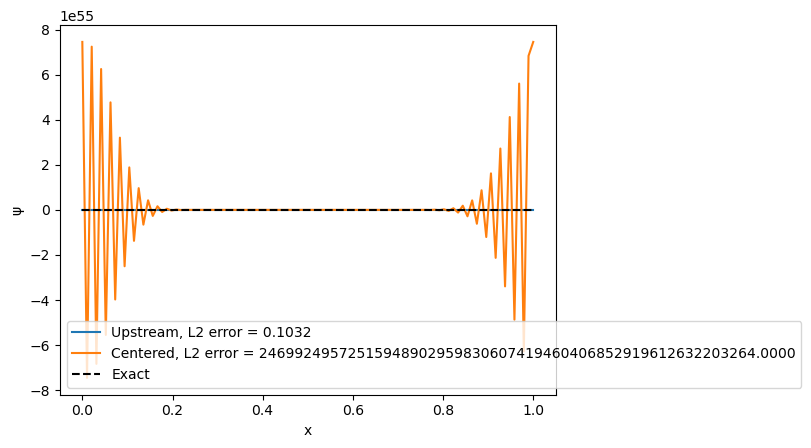

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# set parameters
c = 0.1 # m/s
Lx = 1 # m
Nx = 96
dx = Lx/Nx
a = 0.01

# define initial condition
x = np.linspace(0, Lx, Nx+1)
f = np.exp(-(x-Lx/2)**2/a**2)

# set time step and number of steps
dt = 0.5*dx/c
nsteps = int(Lx/c/dt)

# set up empty arrays to store solutions
phi_up = np.zeros((nsteps, Nx+1))
phi_cen = np.zeros((nsteps, Nx+1))

# set initial conditions
phi_up[0,:] = f
phi_cen[0,:] = f

# time loop
for n in range(1, nsteps):
    phi_up[n,:] = phi_up[n-1,:] - c*dt/dx*(phi_up[n-1,:]-np.roll(phi_up[n-1,:], 1))
    phi_cen[n,:] = phi_cen[n-1,:] - c*dt/dx*(np.roll(phi_cen[n-1,:], -1)-phi_cen[n-1,:])

# periodic boundary conditions
phi_up[:, -1] = phi_up[:, 0]
phi_cen[:, -1] = phi_cen[:, 0]

# calculate L2 norm of the error
l2_up = np.sqrt(dx*np.sum((phi_up[-1,:]-f)**2))
l2_cen = np.sqrt(dx*np.sum((phi_cen[-1,:]-f)**2))

# plot the solutions
plt.figure()
plt.plot(x, phi_up[-1,:], label='Upstream, L2 error = {:.4f}'.format(l2_up))
plt.plot(x, phi_cen[-1,:], label='Centered, L2 error = {:.4f}'.format(l2_cen))
plt.plot(x, f, 'k--', label='Exact')
plt.xlabel('x')
plt.ylabel('ψ')
plt.legend()
plt.show()



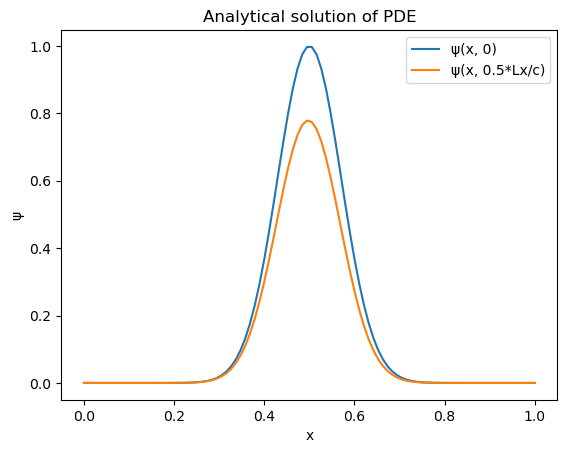

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the spatial grid
Lx = 1  # domain size
Nx = 96  # number of spatial grid points
dx = Lx / (Nx - 1)  # spatial grid spacing
x = np.linspace(0, Lx, Nx)

# Define the advection velocity
c = 0.01  # m/s

# Define the initial condition
a = 0.1 * Lx
f = np.exp(-((x - Lx/2)**2) / a**2)

# Define the time
t = 0.5 * Lx / c

# Define the analytical solution
psi = f * np.exp(-c * t * x)

# Plot the solution
plt.plot(x, f, label='ψ(x, 0)')
plt.plot(x, psi, label='ψ(x, 0.5*Lx/c)')
plt.xlabel('x')
plt.ylabel('ψ')
plt.title('Analytical solution of PDE')
plt.legend()
plt.show()


[ 0.  +0.j          0.  +6.21773546j  0. +12.43547092j  0. +18.65320638j
  0. +24.87094184j  0. +31.0886773j   0. +37.30641276j  0. +43.52414822j
  0. +49.74188368j  0. +55.95961914j  0. +62.1773546j   0. +68.39509006j
  0. +74.61282552j  0. +80.83056098j  0. +87.04829644j  0. +93.2660319j
  0. +99.48376736j  0.+105.70150282j  0.+111.91923828j  0.+118.13697374j
  0.+124.3547092j   0.+130.57244466j  0.+136.79018013j  0.+143.00791559j
  0.+149.22565105j  0.+155.44338651j  0.+161.66112197j  0.+167.87885743j
  0.+174.09659289j  0.+180.31432835j  0.+186.53206381j  0.+192.74979927j
  0.+198.96753473j  0.+205.18527019j  0.+211.40300565j  0.+217.62074111j
  0.+223.83847657j  0.+230.05621203j  0.+236.27394749j  0.+242.49168295j
  0.+248.70941841j  0.+254.92715387j  0.+261.14488933j  0.+267.36262479j
  0.+273.58036025j  0.+279.79809571j  0.+286.01583117j  0.+292.23356663j
 -0.-298.45130209j -0.-292.23356663j -0.-286.01583117j -0.-279.79809571j
 -0.-273.58036025j -0.-267.36262479j -0.-261.1448893

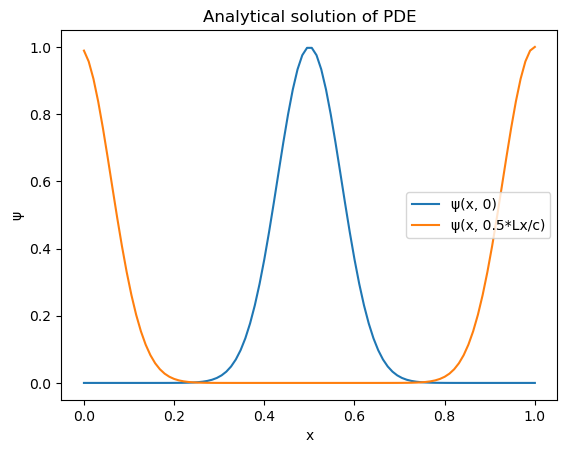

In [15]:
from numpy import *
from scipy.fftpack import fft, ifft, fftfreq

# Define the spatial grid
Lx = 1  # domain size
Nx = 96  # number of spatial grid points
dx = Lx / (Nx - 1)  # spatial grid spacing
x = linspace(0, Lx, Nx)

# Define the advection velocity
c = 0.01  # m/s

# Define the initial condition
a = 0.1 * Lx
f = exp(-((x - Lx/2)**2) / a**2)

# Define the time
t = 0.5 * Lx / c

# Define the Fourier Transform of the initial condition
F = fft(f)

# Define the Fourier Transform of the spatial operator
k = 2*pi*fftfreq(Nx, d=dx)
K = 1j*k
print(K)
# Define the time-stepping operator
E = exp(-c*t*K)
print(E)
# Define the Fourier Transform of the analytical solution
Psi = E*F
print()

# Define the analytical solution
psi = ifft(Psi)
print(psi)
# Plot the solution
plt.plot(x, f, label='ψ(x, 0)')
plt.plot(x, psi, label='ψ(x, 0.5*Lx/c)')
plt.xlabel('x')
plt.ylabel('ψ')
plt.title('Analytical solution of PDE')
plt.legend()
plt.show()


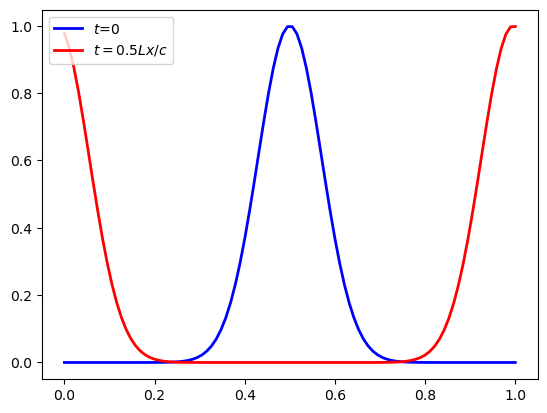

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# User options
iplot = 0

# Set up the grids
Lx = 1.0
nx = 96
dx = Lx / nx
x = np.linspace(0, Lx, nx)
nt = 101
c = 0.01
Lt = Lx / c
dt = Lt / (nt - 1)
t = np.linspace(0, Lt, nt)
tout = 0.5 * Lx / c

if (nx % 2 == 1):
    k = np.linspace(-np.pi / dx, np.pi / dx, nx) # Old way
else:
    k = np.linspace(-np.pi / dx, np.pi / dx - 2 * np.pi / Lx, nx) # Old way
    
k = k.T

# Plot options
height = 1.0
width = 0.1 * Lx

# Initial condition
f = np.zeros((nx, nt))
f[:,0] = height * np.exp(-(x - 0.5 * Lx)**2 / width**2)
Ff = [np.fft.fftshift(np.fft.fft(f[:,0]))]

# Solution at each time
for n in range(1, nt):
    Ff = np.append(Ff, [Ff[0] * np.exp((-1j * k * c) * t[n-1])], axis=0)
    f[:,n] = np.real(np.fft.ifft(np.fft.ifftshift(Ff[n])))

# Plot final solution
plt.figure()
plt.plot(x, f[:,0], 'blue', linewidth=2)

nind = np.max(np.where(t <= tout))
plt.plot(x, f[:,nind], 'red', linewidth=2)
plt.legend(['$t$=0','$t=0.5L x/c$'],loc='best')

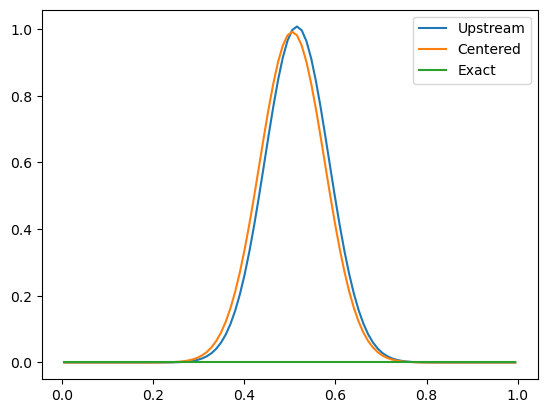

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 0.1  # m/s
a = 0.1  # m
Lx = 1  # m
Nx = 96
dt = 0.5 * Lx / (Nx * c)  # time step
t = Lx / c  # final time

# Grid
dx = Lx / Nx
x = np.linspace(0.5 * dx, Lx - 0.5 * dx, Nx)

# Initial condition
phi = np.exp(-((x - Lx / 2)**2) / (a**2))

# Upstream scheme
phi_up = np.empty_like(phi)
phi_up[0] = phi[-2]  # periodic boundary condition
for i in range(1, Nx):
    phi_up[i] = phi[i - 1] - c * dt / dx * (phi[i] - phi[i - 1])

# Centered scheme
phi_cen = np.empty_like(phi)
phi_cen[0] = phi[-2]  # periodic boundary condition
phi_cen[-1] = phi[1]  # periodic boundary condition
for i in range(1, Nx - 1):
    phi_cen[i] = 0.5 * (phi[i + 1] + phi[i - 1]) - 0.5 * c * dt / dx * (phi[i + 1] - phi[i - 1])

# Exact solution
exact = np.exp(-((x - Lx / 2 - c * t)**2) / (a**2))

# Plotting
plt.plot(x, phi_up, label='Upstream')
plt.plot(x, phi_cen, label='Centered')
plt.plot(x, exact, label='Exact')
plt.legend()
plt.show()

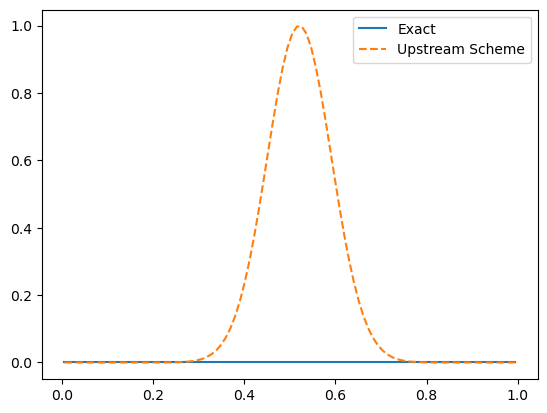

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 0.1  # m/s
a = 0.1  # m
Lx = 1  # m
Nx = 96
dt = 0.5 * Lx / (Nx * c)  # time step
t = Lx/c

# Grid
dx = Lx/Nx
x = np.linspace(0.5*dx, Lx-0.5*dx, Nx)

# Initial condition
f = np.exp(-((x-Lx/2)**2)/(a**2))
phi = np.copy(f)

# Exact solution
exact = np.exp(-((x-Lx/2-c*t)**2)/(a**2))

# Upstream scheme
for i in range(int(t/dt)):
    phi[1:] = phi[:-1]
    phi[0] = phi[-1]

# Plotting
plt.plot(x, exact, label='Exact')
plt.plot(x, phi, '--', label='Upstream Scheme')
plt.legend()
plt.show()


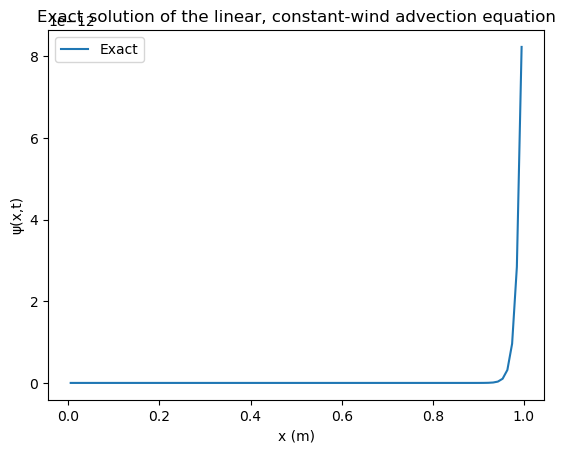

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 0.1  # m/s
Lx = 1  # m
a = 0.1 * Lx
Nx = 96
dx = Lx/Nx
x = np.linspace(0.5*dx, Lx-0.5*dx, Nx)

# Initial condition
def f(x, a):
    return np.exp(-((x - Lx/2)**2)/a**2)
phi = f(x, a)

# Exact solution
t = Lx/c
def phi_exact(x, t, a):
    return f(x - c*t, a)
phi_exact = phi_exact(x, t, a)

# Plot
plt.plot(x, phi_exact, label="Exact")
plt.legend()
plt.xlabel("x (m)")
plt.ylabel("ψ(x,t)")
plt.title("Exact solution of the linear, constant-wind advection equation")
plt.show()


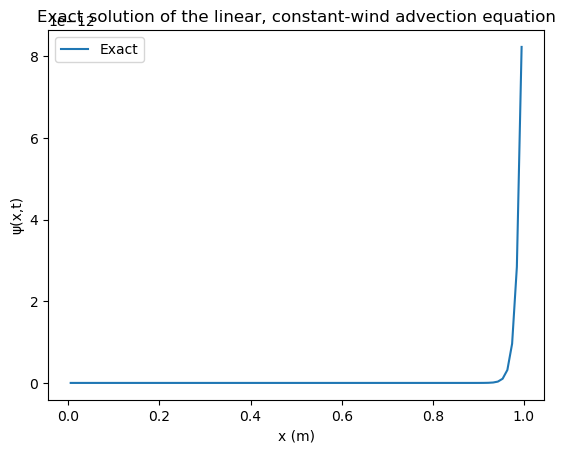

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 0.1  # m/s
Lx = 1  # m
a = 0.1 * Lx
Nx = 96
dx = Lx/Nx
x = np.linspace(0.5*dx, Lx-0.5*dx, Nx)

# Initial condition
def f(x, a):
    return np.exp(-((x - Lx/2)**2)/a**2)
phi = f(x, a)

# Exact solution
t = Lx/c
def phi_exact(x, t, a):
    return f(x - c*t, a)
phi_exact = phi_exact(x, t, a)

# Plot
plt.plot(x, phi_exact, label="Exact")
plt.legend()
plt.xlabel("x (m)")
plt.ylabel("ψ(x,t)")
plt.title("Exact solution of the linear, constant-wind advection equation")
plt.show()


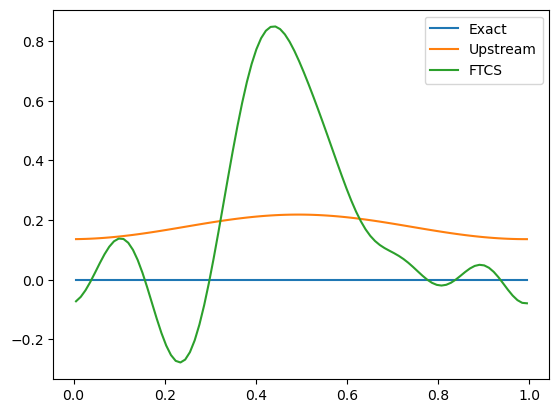

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
c = 0.1  # m/s
Lx = 1  # m
Nx = 96
a = 0.1 * Lx
mu = c * Lx / Nx
dx = Lx / Nx
dt = mu * dx

# Initial condition
x = np.linspace(0.5*dx, Lx-0.5*dx, Nx)
phi = np.exp(-((x - Lx/2)**2) / a**2)

# Exact solution
t = Lx / c
phi_exact = np.exp(-((x - Lx/2 - c*t)**2) / a**2)

# Upstream scheme
phi_upstream = np.zeros(Nx)
for n in range(int(t/dt)):
    for i in range(1, Nx):
        phi_upstream[i] = phi[i] - mu * (phi[i] - phi[i-1])
    phi_upstream[0] = phi[0] - mu * (phi[0] - phi[-1])
    phi = np.copy(phi_upstream)

# Forward in time, centered in space scheme
phi = np.exp(-((x - Lx/2)**2) / a**2)
phi_ftcs = np.zeros(Nx)
for n in range(int(t/dt)):
    for i in range(1, Nx-1):
        phi_ftcs[i] = phi[i] - mu/2 * (phi[i+1] - phi[i-1])
    phi_ftcs[0] = phi[0] - mu/2 * (phi[1] - phi[-1])
    phi_ftcs[-1] = phi[-1] - mu/2 * (phi[0] - phi[-2])
    phi = np.copy(phi_ftcs)

# Plotting
plt.plot(x, phi_exact, label='Exact')
plt.plot(x, phi_upstream, label='Upstream')
plt.plot(x, phi_ftcs, label='FTCS')
plt.legend()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (96,) and (95,)

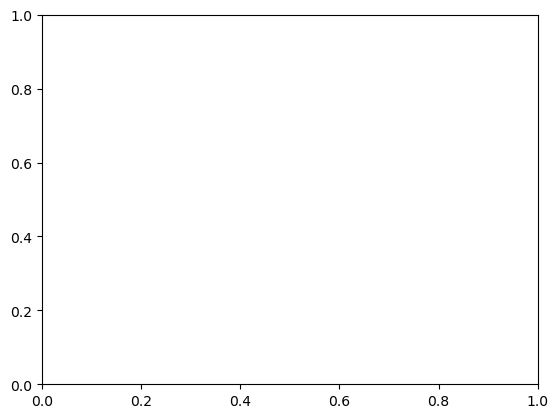

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 0.1
Lx = 1
Nx = 96
dx = Lx / Nx
dt = 0.5 * dx / c
a = 0.1 * Lx


# Staggered periodic domain
x = np.linspace(-0.5 * dx, Lx + 0.5 * dx, Nx + 2)

# Initial condition
def f(x):
    return np.exp(-((x - Lx / 2)**2) / a**2)

phi0 = f(x[1:-1])

# Exact solution
def phi_exact(t):
    return f(x[1:-1] - c * t)

phi_ex = phi_exact(Lx / c)

# Upstream scheme
def upstream_scheme(phi0):
    phi = np.empty(Nx + 2)
    phi[1:-1] = phi0
    phi[0] = phi0[-2]
    phi[-1] = phi0[1]
    for n in range(int(Lx / c / dt)):
        phi_new = np.empty(Nx + 2)
        for i in range(1, Nx + 1):
            phi_new[i] = phi[i] - c * dt / dx * (phi[i] - phi[i-1])
        phi_new[0] = phi_new[-2]
        phi_new[-1] = phi_new[1]
        phi = phi_new
    return phi[1:-1]

phi_up = upstream_scheme(phi0)

# Forward in time, centered in space scheme
def ftcs_scheme(phi0):
    phi = np.empty(Nx + 2)
    phi[1:-1] = phi0
    phi[0] = phi0[-2]
    phi[-1] = phi0[1]
    for n in range(int(Lx / c / dt)):
        phi_new = np.empty(Nx + 2)
        for i in range(1, Nx + 1):
            phi_new[i] = phi[i] - c * dt / (2 * dx) * (phi[i+1] - phi[i-1])
        phi_new[0] = phi_new[-2]
        phi_new[-1] = phi_new[1]
        phi = phi_new
    return phi[1:-1]

phi_ftcs = ftcs_scheme(phi0)

# Plotting
plt.plot(x[1:-1], phi_ex, label='Exact')
plt.plot(x[1:-1], phi_up, label='Upstream')
plt.plot(x[1:-1], phi_ftcs, label='FTBS')
plt.legend()
plt.show()


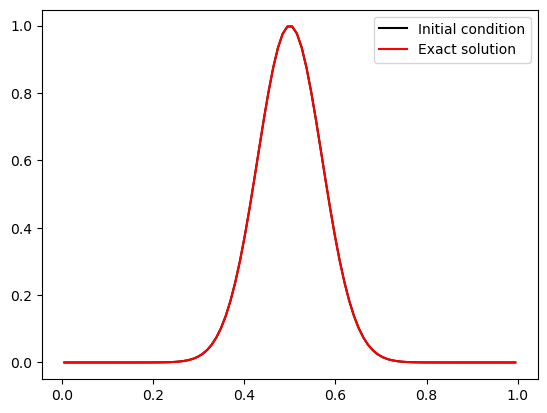

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Lx = 1  # length of domain
c = 0.1  # wind speed
a = 0.1*Lx  # width of initial Gaussian
Nx = 96  # number of grid points
dx = Lx/Nx  # spatial grid step
x = np.linspace(0.5*dx, Lx-0.5*dx, Nx)  # staggered grid
dt = 0.5*dx/c  # time step
t = Lx/c  # final time

def f(x):
  return np.exp(-((x-Lx/2)**2)/a**2)

phi0 = f(x)  # initial condition
phi_exact = f((x-c*t) % Lx)  # exact solution at t = Lx/c

# plot the exact solution and the two numerical solutions
plt.plot(x, phi0, 'k', label='Initial condition')
plt.plot(x, phi_exact, 'r', label='Exact solution')
plt.legend()
plt.show()


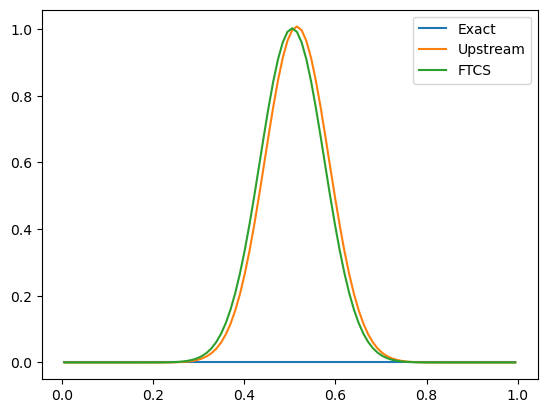

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
c = 0.1 # m/s
Lx = 1.0 # m
a = 0.1 * Lx
Nx = 96
dx = Lx / Nx
dt = 0.5 * dx / c
t = Lx / c

x = np.linspace(0.5 * dx, Lx - 0.5 * dx, Nx)
phi_0 = np.exp(-((x - Lx/2)**2) / a**2)

# Exact solution
phi_exact = np.exp(-((x - (Lx/2 - c*t))**2) / a**2)

# Upstream scheme
phi_upstream = np.zeros(Nx)
phi_upstream[0] = phi_0[-1]
for i in range(1, Nx):
    phi_upstream[i] = phi_0[i-1] - c * dt / dx * (phi_0[i] - phi_0[i-1])

# FTCS scheme
phi_ftcs = np.zeros(Nx)
phi_ftcs[0] = phi_0[-1]
phi_ftcs[-1] = phi_0[0]
for i in range(1, Nx-1):
    phi_ftcs[i] = phi_0[i] - c * dt / (2 * dx) * (phi_0[i+1] - phi_0[i-1])

# Plotting
plt.plot(x, phi_exact, label='Exact')
plt.plot(x, phi_upstream, label='Upstream')
plt.plot(x, phi_ftcs, label='FTCS')
plt.legend()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (98,) and (95,)

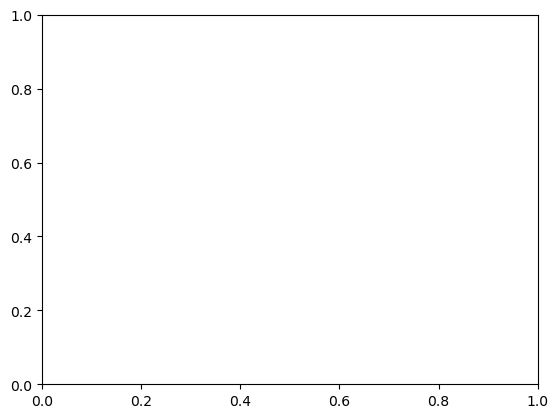

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 0.1
Lx = 1
Nx = 96
dx = Lx / Nx
dt = 0.5 * dx / c
a = 0.1 * Lx

# Staggered periodic domain
x = np.linspace(-0.5 * dx, Lx + 0.5 * dx, Nx + 2)

# Initial condition
def f(x):
    return np.exp(-((x - Lx / 2)**2) / a**2)

phi0 = f(x[1:-1])

# Exact solution
def phi_exact(t):
    return f(x[1:-1] - c * t)

phi_ex = phi_exact(Lx / c)

# Upstream scheme
def upstream_scheme(phi0):
    phi = np.empty(Nx + 2)
    phi[1:-1] = phi0
    phi[0] = phi0[-2]
    phi[-1] = phi0[1]
    for n in range(int(Lx / c / dt)):
        phi_new = np.empty(Nx + 2)
        for i in range(1, Nx + 1):
            phi_new[i] = phi[i] - c * dt / dx * (phi[i] - phi[i-1])
        phi_new[0] = phi_new[-2]
        phi_new[-1] = phi_new[1]
        phi = phi_new
    return phi[1:-1]

phi_up = upstream_scheme(phi0)

# Forward in time, centered in space scheme
def ftcs_scheme(phi0):
    phi = np.empty(Nx + 2)
    phi[1:-1] = phi0
    phi[0] = phi0[-2]
    phi[-1] = phi0[1]
    for n in range(int(Lx / c / dt)):
        phi_new = np.empty(Nx + 2)
        for i in range(1, Nx + 1):
            phi_new[i] = phi[i] - c * dt / (2 * dx) * (phi[i+1] - phi[i-1])
        phi_new[0] = phi_new[-2]
        phi_new[-1] = phi_new[1]
        phi = phi_new
    return phi[1:-1]

phi_ftcs = ftcs_scheme(phi0)


# Plotting
plt.plot(x[1:-1], phi_ex, label='Exact')
plt.plot(x[1:-1], phi_up, label='Upstream')
plt.plot(x[1:-1], phi_ftcs, label='FTBS')
plt.legend()
plt.show()


[-0.00520833  0.00520833  0.015625    0.02604167  0.03645833  0.046875
  0.05729167  0.06770833  0.078125    0.08854167  0.09895833  0.109375
  0.11979167  0.13020833  0.140625    0.15104167  0.16145833  0.171875
  0.18229167  0.19270833  0.203125    0.21354167  0.22395833  0.234375
  0.24479167  0.25520833  0.265625    0.27604167  0.28645833  0.296875
  0.30729167  0.31770833  0.328125    0.33854167  0.34895833  0.359375
  0.36979167  0.38020833  0.390625    0.40104167  0.41145833  0.421875
  0.43229167  0.44270833  0.453125    0.46354167  0.47395833  0.484375
  0.49479167  0.50520833  0.515625    0.52604167  0.53645833  0.546875
  0.55729167  0.56770833  0.578125    0.58854167  0.59895833  0.609375
  0.61979167  0.63020833  0.640625    0.65104167  0.66145833  0.671875
  0.68229167  0.69270833  0.703125    0.71354167  0.72395833  0.734375
  0.74479167  0.75520833  0.765625    0.77604167  0.78645833  0.796875
  0.80729167  0.81770833  0.828125    0.83854167  0.84895833  0.859375
  0.86

<function matplotlib.pyplot.show(close=None, block=None)>

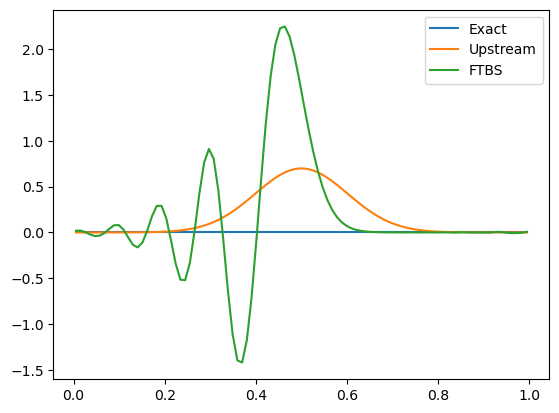

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 0.1
Lx = 1
Nx = 96
dx = Lx / Nx
dt = 0.5 * dx / c
a = 0.1 * Lx

# Staggered periodic domain
x = np.linspace(-0.5 * dx, Lx + 0.5 * dx, Nx + 2)
print(x)
# Initial condition
def f(x):
    return np.exp(-((x - Lx / 2)**2) / a**2)

phi0 = f(x[1:-1])
# Exact solution
def phi_exact(t):
    return f(x[1:-1] - c * t)

phi_ex = phi_exact(Lx / c)

# Upstream scheme
def upstream_scheme(phi0):
    phi = np.empty(Nx + 2)
    phi[1:-1] = phi0
    phi[0] = phi0[-2]
    phi[-1] = phi0[1]
    for n in range(int(Lx / c / dt)):
        phi_new = np.empty(Nx + 2)
        for i in range(1, Nx + 1):
            phi_new[i] = phi[i] - c * dt / dx * (phi[i] - phi[i-1])
        phi_new[0] = phi_new[-2]
        phi_new[-1] = phi_new[1]
        phi = phi_new
    return phi[1:-1]

phi_up = upstream_scheme(phi0)

# Forward in time, centered in space scheme
def ftcs_scheme(phi0):
    phi = np.empty(Nx + 2)
    phi[1:-1] = phi0
    phi[0] = phi0[-2]
    phi[-1] = phi0[1]
    for n in range(int(Lx / c / dt)):
        phi_new = np.empty(Nx + 2)
        for i in range(1, Nx + 1):
            phi_new[i] = phi[i] - c * dt / (2 * dx) * (phi[i+1] - phi[i-1])
        phi_new[0] = phi_new[-2]
        phi_new[-1] = phi_new[1]
        phi = phi_new
    return phi[1:-1]

phi_ftcs = ftcs_scheme(phi0)

# Plotting
plt.plot(x[1:-1], phi_ex, label='Exact')
plt.plot(x[1:-1], phi_up, label='Upstream')
plt.plot(x[1:-1], phi_ftcs, label='FTBS')
plt.legend()
plt.show


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 0.1
Lx = 1
Nx = 96
dx = Lx / Nx
dt = 0.5 * dx / c
a = 0.1 * Lx

# Staggered periodic domain
x = np.linspace(-0.5 * dx, Lx + 0.5 * dx, Nx + 2)

# Initial condition
def f(x):
    return np.exp(-((x - Lx / 2)**2) / a**2)

phi0 = f(x[1:-1])

# Exact solution
def phi_exact(t):
    return f(x[1:-1] - c * t)

phi_ex = phi_exact(Lx / c)

# Upstream scheme
def upstream_scheme(phi0):
    phi = np.empty(Nx + 2)
    phi[1:-1] = phi0
    phi[0] = phi0[-2]
    phi[-1] = phi0[1]
    for n in range(int(Lx / c / dt)):
        phi_new = np.empty(Nx + 2)
        for i in range(1, Nx + 1):
            phi_new[i] = phi[i] - c * dt / dx * (phi[i] - phi[i-1])
        phi_new[0] = phi_new[-2]
        phi_new[-1] = phi_new[1]
        phi = phi_new
    return phi[1:-1]

phi_up = upstream_scheme(phi0)

# Forward in time, centered in space scheme
def ftcs_scheme(phi0):
    phi = np.empty(Nx + 2)
    phi[1:-1] = phi0
    phi[0] = phi0[-2]
    phi[-1] = phi0[1]
    for n in range(int(Lx / c / dt)):
        phi_new = np.empty(Nx + 2)
        for i in range(1, Nx + 1):
            phi_new[i] = phi[i] - c * dt / (2 * dx) * (phi[i+1] - phi[i-1])
        phi_new[0] = phi_new[-2]
        phi_new[-1] = phi_new[1]
        phi = phi_new
    return phi[1:-1]

phi_ftcs = ftcs_scheme(phi0)

# Plotting
plt.plot(x[1:-1], phi_ex, label='Exact')
plt.plot(x[1:-1], phi_up, label='Upstream')
plt.plot(x[1:-1], phi_ftcs, label='FTBS')
plt.legend()
plt.show()


ValueError: could not broadcast input array from shape (95,) into shape (96,)